In [1]:
import numpy as np
seed = 27092016
rng = np.random.RandomState(seed)

In [2]:
size = 1000
a = np.random.randn(size)
b = np.random.randn(size)

In [3]:
%%timeit -n 100 -r 3
c = np.empty(size)
for i in range(size):
    c[i] = a[i] + b[i]

250 μs ± 5.19 μs per loop (mean ± std. dev. of 3 runs, 100 loops each)


In [4]:
%%timeit -n 100 -r 3
c = a + b

1.01 μs ± 210 ns per loop (mean ± std. dev. of 3 runs, 100 loops each)


In [5]:
def fprop(inputs, weights, biases):
    y = np.dot(inputs, weights.T) + biases
    return y

In [6]:
inputs = np.array([[0., -1., 2.], [-6., 3., 1.]])
weights = np.array([[2., -3., -1.], [-5., 7., 2.]])
biases = np.array([5., -3.])
true_outputs = np.array([[6., -6.], [-17., 50.]])

if not np.allclose(fprop(inputs, weights, biases), true_outputs):
    print('Wrong outputs computed.')
else:
    print('All outputs correct!')

All outputs correct!


# Dot exercise

In [7]:
A = np.arange(9).reshape((3, 3))
B = np.ones((3, 3)) * 2
a = np.array([-1., 0., 1.])
b = np.array([0.1, 0.2, 0.3])
print(f'A value is: \n{A}, \nA shape is: {A.shape}')
print(f'B value is: \n{B}, \nB shape is: {B.shape}')
print(f'a value is: \n{a}, \na shape is: {a.shape}')
print(f'b value is: \n{b}, \nb shape is: {b.shape}')
print(f'A.dot(B) value is: \n{A.dot(B)}, \nA.dot(B) shape is: {A.dot(B).shape}')
print(f'B.dot(A) value is: \n{B.dot(A)}, \nB.dot(A) shape is: {B.dot(A).shape}')
print(f'A.dot(b) value is: \n{A.dot(b)}, \nA.dot(b) shape is: {A.dot(b).shape}')
print(f'b.dot(A) value is: \n{b.dot(A)}, \nb.dot(A) shape is: {b.dot(A).shape}')
print(f'a.dot(b) value is: \n{a.dot(b)}, \na.dot(b) shape is: {a.dot(b).shape}')

A value is: 
[[0 1 2]
 [3 4 5]
 [6 7 8]], 
A shape is: (3, 3)
B value is: 
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]], 
B shape is: (3, 3)
a value is: 
[-1.  0.  1.], 
a shape is: (3,)
b value is: 
[0.1 0.2 0.3], 
b shape is: (3,)
A.dot(B) value is: 
[[ 6.  6.  6.]
 [24. 24. 24.]
 [42. 42. 42.]], 
A.dot(B) shape is: (3, 3)
B.dot(A) value is: 
[[18. 24. 30.]
 [18. 24. 30.]
 [18. 24. 30.]], 
B.dot(A) shape is: (3, 3)
A.dot(b) value is: 
[0.8 2.6 4.4], 
A.dot(b) shape is: (3,)
b.dot(A) value is: 
[2.4 3.  3.6], 
b.dot(A) shape is: (3,)
a.dot(b) value is: 
0.19999999999999998, 
a.dot(b) shape is: ()


In [8]:
A = np.arange(6).reshape((3, 2))
b = np.array([0.1, 0.2])
c = np.array([-1., 0., 1.])
print(A + b)
print((A.T + c).T)
print(A * b)

[[0.1 1.2]
 [2.1 3.2]
 [4.1 5.2]]
[[-1.  0.]
 [ 2.  3.]
 [ 5.  6.]]
[[0.  0.2]
 [0.2 0.6]
 [0.4 1. ]]


# Exe 2

In [9]:
import matplotlib.pyplot as plt
from mlp.data_providers import CCPPDataProvider

data_provider = CCPPDataProvider(
    which_set = 'train',
    input_dims=[0, 1],
    batch_size=5000,
    max_num_batches=1,
    shuffle_order=False
)
input_dim, output_dim = 2, 1

inputs, targets = data_provider.next()
print(f'after next, inputs are {inputs}, targets are {targets}')

after next, inputs are [[ 0.61680103 -1.38985944]
 [ 0.88591217 -0.7558766 ]
 [ 0.33309818 -1.23697451]
 ...
 [ 0.80901621 -0.2021922 ]
 [-0.18108704  0.70724322]
 [ 0.32932562  0.8300502 ]], targets are [[ 1.07024963]
 [ 1.32103917]
 [ 0.66652536]
 ...
 [ 0.57218631]
 [-0.85110287]
 [-0.37706378]]


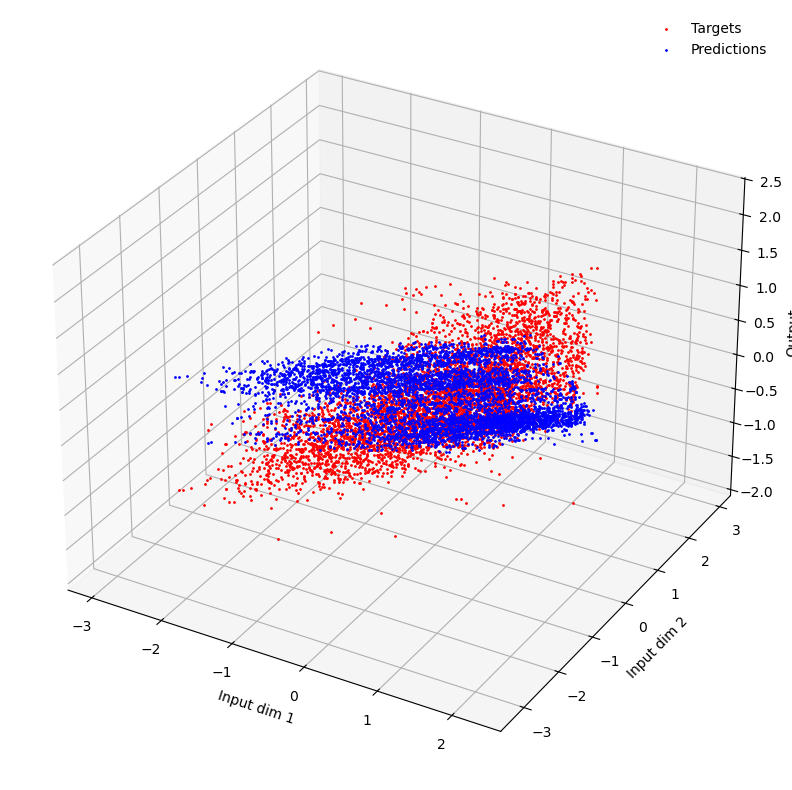

In [10]:
weights_init_range = 0.5
biases_init_range = 0.1

weights = rng.uniform(
    low=-weights_init_range,
    high=weights_init_range,
    size=(output_dim, input_dim)
)

biases = rng.uniform(
    low=-biases_init_range,
    high=biases_init_range,
    size=output_dim
)

outputs = fprop(inputs, weights, biases)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(inputs[:, 0], inputs[:, 1], targets[:, 0], 'r.', ms=2)
ax.plot(inputs[:, 0], inputs[:, 1], outputs[:, 0], 'b.', ms=2)
ax.set_xlabel('Input dim 1')
ax.set_ylabel('Input dim 2')
ax.set_zlabel('Output')
ax.legend(['Targets', 'Predictions'], frameon=False)
fig.tight_layout()
plt.show()


In [11]:
def error(outputs, targets):
    batch_size = outputs.shape[0]
    _error = np.sum((outputs - targets) ** 2) / (2 * batch_size)
    return _error

def error_grad(outputs, targets):
    batch_size = outputs.shape[0]
    _error_grad = (outputs - targets) / batch_size
    return _error_grad

In [12]:
outputs = np.array([[1., 2.], [-1., 0.], [6., -5.], [-1., 1.]])
targets = np.array([[0., 1.], [3., -2.], [7., -3.], [1., -2.]])
true_error = 5.
true_error_grad = np.array([[0.25, 0.25], [-1., 0.5], [-0.25, -0.5], [-0.5, 0.75]])

if not error(outputs, targets) == true_error:
    print('Error calculated incorrectly')
elif not np.allclose(error_grad(outputs, targets), true_error_grad):
    print('Error gradient calculated incorrectly.')
else:
    print('Error function and gradient computed correctly!')

Error function and gradient computed correctly!


# Exe 4

In [13]:
# Todo: can review this
def grads_wrt_params(inputs, grads_wrt_outputs):
    grads_wrt_weights = np.dot(grads_wrt_outputs.T, inputs)
    grads_wrt_biases = np.sum(grads_wrt_outputs)
    return [grads_wrt_weights, grads_wrt_biases]

In [14]:
inputs = np.array([[1., 2., 3.], [-1., 4., -9.]])
grads_wrt_outputs = np.array([[-1., 1.], [2., -3.]])
true_grads_wrt_weights = np.array([[-3., 6., -21.], [4., -10., 30.]])
true_grads_wrt_biases = np.array([1., -2.])

grads_wrt_weights, grads_wrt_biases = grads_wrt_params(
    inputs, grads_wrt_outputs)

if not np.allclose(true_grads_wrt_weights, grads_wrt_weights):
    print('Gradients with respect to weights incorrect.')
elif not np.allclose(true_grads_wrt_biases, grads_wrt_biases):
    print('Gradients with respect to biases incorrect.')
else:
    print('All parameter gradients calculated correctly!')

Gradients with respect to biases incorrect.


# Exe 5

Epoch 1: 0.0s to complete
    error(train)=1.67e-01
Epoch 2: 0.0s to complete
    error(train)=9.30e-02
Epoch 3: 0.0s to complete
    error(train)=7.95e-02
Epoch 4: 0.0s to complete
    error(train)=7.71e-02
Epoch 5: 0.0s to complete
    error(train)=7.66e-02
Epoch 6: 0.0s to complete
    error(train)=7.65e-02
Epoch 7: 0.0s to complete
    error(train)=7.65e-02
Epoch 8: 0.0s to complete
    error(train)=7.65e-02
Epoch 9: 0.0s to complete
    error(train)=7.63e-02
Epoch 10: 0.0s to complete
    error(train)=7.64e-02


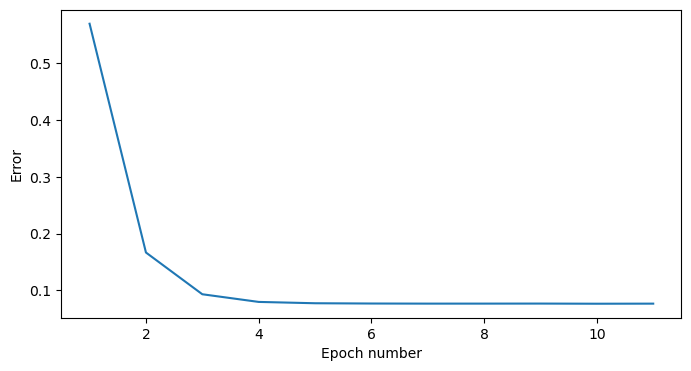

In [15]:
from mlp.layers import AffineLayer
from mlp.errors import SumOfSquaredDiffsError
from mlp.models import SingleLayerModel
from mlp.initialisers import UniformInit, ConstantInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser
import logging

seed = 27092016
rng = np.random.RandomState(seed)

logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

train_data = CCPPDataProvider('train', [0, 1], batch_size=100, rng=rng)
input_dim, output_dim =2, 1

param_init = UniformInit(-0.1, 0.1, rng=rng)

layer = AffineLayer(input_dim, output_dim, param_init, param_init)
model = SingleLayerModel(layer)

error = SumOfSquaredDiffsError()

learning_rule = GradientDescentLearningRule(learning_rate=1e-2)

optimiser = Optimiser(model, error, learning_rule, train_data)

stats, keys = optimiser.train(num_epochs=10, stats_interval=1)

fig=plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(np.arange(1, stats.shape[0] + 1), stats[:, keys['error(train)']])
ax.set_xlabel('Epoch number')
ax.set_ylabel('Error')
plt.show()

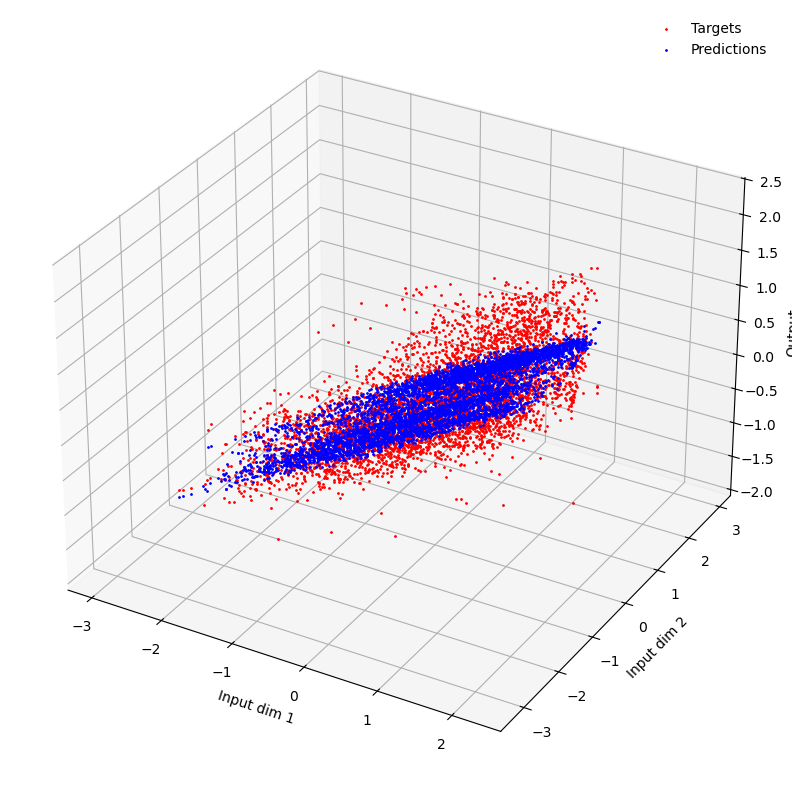

In [21]:
data_provider = CCPPDataProvider(
    which_set='train',
    input_dims=[0, 1],
    batch_size=5000,
    max_num_batches=1,
    shuffle_order=False
)

inputs, targets = data_provider.next()

outputs = model.fprop(inputs)[-1]
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(inputs[:, 0], inputs[:, 1], targets[:, 0], 'r.', ms=2)
ax.plot(inputs[:, 0], inputs[:, 1], outputs[:, 0], 'b.', ms=2)
ax.set_xlabel('Input dim 1')
ax.set_ylabel('Input dim 2')
ax.set_zlabel('Output')
ax.legend(['Targets', 'Predictions'], frameon=False)
fig.tight_layout()
plt.show()

# Exe 6

In [23]:
from ipywidgets import interact
%matplotlib inline

def setup_figure():
    # create figure and axes
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_axes([0., 0., 0.5, 1.], projection='3d')
    ax2 = fig.add_axes([0.6, 0.1, 0.4, 0.8])
    # set axes properties
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.yaxis.set_ticks_position('left')
    ax2.xaxis.set_ticks_position('bottom')
    #ax2.set_yscale('log')
    ax1.set_xlim((-2, 2))
    ax1.set_ylim((-2, 2))
    ax1.set_zlim((-2, 2))
    #set axes labels and title
    ax1.set_title('Parameter trajectories over training')
    ax1.set_xlabel('Weight 1')
    ax1.set_ylabel('Weight 2')
    ax1.set_zlabel('Bias')
    ax2.set_title('Batch errors over training')
    ax2.set_xlabel('Batch update number')
    ax2.set_ylabel('Batch error')
    return fig, ax1, ax2

def visualise_training(n_epochs=1, batch_size=200, log_lr=-1., n_inits=1,
                       w_scale=1., b_scale=1., elev=30., azim=0.):
    fig, ax1, ax2 = setup_figure()
    # create seeded random number generator
    rng = np.random.RandomState(1234)
    # create data provider
    data_provider = CCPPDataProvider(
        input_dims=[0, 1],
        batch_size=batch_size, 
        shuffle_order=False,
    )
    learning_rate = 10 ** log_lr
    n_batches = data_provider.num_batches
    weights_traj = np.empty((n_inits, n_epochs * n_batches + 1, 1, 2))
    biases_traj = np.empty((n_inits, n_epochs * n_batches + 1, 1))
    errors_traj = np.empty((n_inits, n_epochs * n_batches))
    # randomly initialise parameters
    weights = rng.uniform(-w_scale, w_scale, (n_inits, 1, 2))
    biases = rng.uniform(-b_scale, b_scale, (n_inits, 1))
    # store initial parameters
    weights_traj[:, 0] = weights
    biases_traj[:, 0] = biases
    # iterate across different initialisations
    for i in range(n_inits):
        # iterate across epochs
        for e in range(n_epochs):
            # iterate across batches
            for b, (inputs, targets) in enumerate(data_provider):
                outputs = fprop(inputs, weights[i], biases[i])
                errors_traj[i, e * n_batches + b] = error(outputs, targets)
                grad_wrt_outputs = error_grad(outputs, targets)
                weights_grad, biases_grad = grads_wrt_params(inputs, grad_wrt_outputs)
                weights[i] -= learning_rate * weights_grad
                biases[i] -= learning_rate * biases_grad
                weights_traj[i, e * n_batches + b + 1] = weights[i]
                biases_traj[i, e * n_batches + b + 1] = biases[i]
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, n_inits))
    # plot all trajectories
    for i in range(n_inits):
        lines_1 = ax1.plot(
            weights_traj[i, :, 0, 0], 
            weights_traj[i, :, 0, 1], 
            biases_traj[i, :, 0], 
            '-', c=colors[i], lw=2)
        lines_2 = ax2.plot(
            np.arange(n_batches * n_epochs),
            errors_traj[i],
            c=colors[i]
        )
    ax1.view_init(elev, azim)
    plt.show()

w = interact(
    visualise_training,
    elev=(-90, 90, 2),
    azim=(-180, 180, 2), 
    n_epochs=(1, 50), 
    batch_size=(10, 1000, 100),
    log_lr=(-5., 1.),
    w_scale=(0., 4.),
    b_scale=(0., 4.),
    n_inits=(1, 10)
)

for child in w.widget.children:
    child.layout.width = '100%'

interactive(children=(IntSlider(value=1, description='n_epochs', max=50, min=1), IntSlider(value=200, descript…

In [25]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [26]:
torch.manual_seed(seed)

learning_rate = 1e-2
num_epoches = 10
batch_size = 100
input_dim = 2
output_dim = 1

In [27]:
class CCPPDataProvider(Dataset):
    """Combined Cycle Power Plant dataset."""
    def __init__(self, data_path, which_set='train', x_dims=None):
        super().__init__()
        self.data = np.load(data_path)

        assert which_set in ['train', 'valid'],(
            'Expected which_set to be either train or valid'
            'Got {0}'.format(which_set)
        )
        self.x = self.data[which_set + '_inputs']
        if x_dims is not None:
            self.x = self.x[:, x_dims]
        self.x = torch.from_numpy(self.x).to(torch.float32)
        self.t = self.data[which_set + '_targets']
        self.t = torch.from_numpy(self.t).to(torch.float32)

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.t[idx]

In [28]:
class SingleLayerModel(nn.Module):
    """Single layer model."""
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.layer = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.layer(x)

In [34]:
def weights_init(m):
    """Reinitialize model weights"""
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        nn.init.uniform_(m.weight.data, -0.1, 0.1)
        nn.init.constant_(m.bias.data, 0)

In [35]:
data_path = os.path.join(os.environ['MLP_DATA_DIR'], 'ccpp_data.npz')
assert os.path.isfile(data_path), ('Data file does not exist at expected path: ' + data_path)

dataset = CCPPDataProvider(data_path, which_set='train', x_dims=[0, 1])

dataloader = DataLoader(dataset, batch_size=100, shuffle=False)

In [36]:
model = SingleLayerModel(input_dim, output_dim)
model.apply(weights_init)

print(f"Model structure: {model}\n\n")

loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Model structure: SingleLayerModel(
  (layer): Linear(in_features=2, out_features=1, bias=True)
)




Epoch [1/10]	Error(train): 0.1575
Epoch [2/10]	Error(train): 0.1532
Epoch [3/10]	Error(train): 0.1532
Epoch [4/10]	Error(train): 0.1533
Epoch [5/10]	Error(train): 0.1533
Epoch [6/10]	Error(train): 0.1533
Epoch [7/10]	Error(train): 0.1533
Epoch [8/10]	Error(train): 0.1533
Epoch [9/10]	Error(train): 0.1533
Epoch [10/10]	Error(train): 0.1533


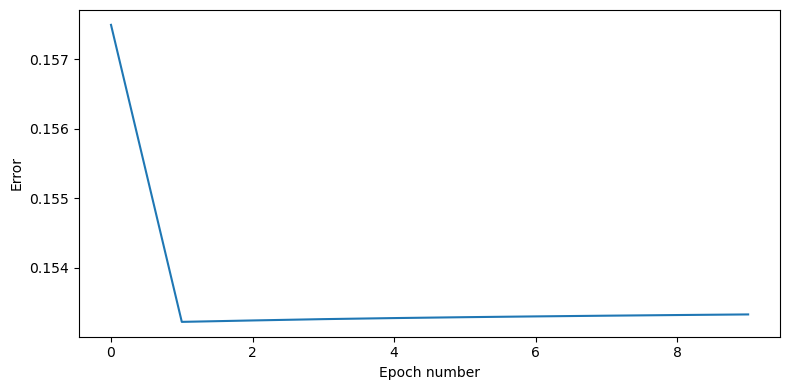

In [39]:
# Keep track of the loss values over training
train_loss = [] 

for epoch in range(num_epoches):
    model.train()
    epoch_loss = 0

    for x, t in dataloader:
        y = model(x)
        E_value = loss(y, t)
        optimizer.zero_grad()
        E_value.backward()
        optimizer.step()
        epoch_loss += E_value.item()
    # Calculate average loss for this epoch
    avg_epoch_loss = epoch_loss / len(dataloader)
    print(f"Epoch [{epoch+1}/{num_epoches}]\tError(train): {avg_epoch_loss:.4f}")
    train_loss.append(avg_epoch_loss)

# Plot the change in the error over training.
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(train_loss)
ax.set_xlabel('Epoch number')
ax.set_ylabel('Error')
fig.tight_layout()
plt.show()

In [40]:
predictions = []
inputs = []
targets = []

with torch.no_grad():
    model.eval()
    for x, t in dataloader:
        inputs.append(x.numpy())
        targets.append(t.numpy())
        y = model(x)
        predictions.append(y.numpy())
        
predictions = np.concatenate(predictions, axis=0)
inputs = np.concatenate(inputs, axis=0)
targets = np.concatenate(targets, axis=0)

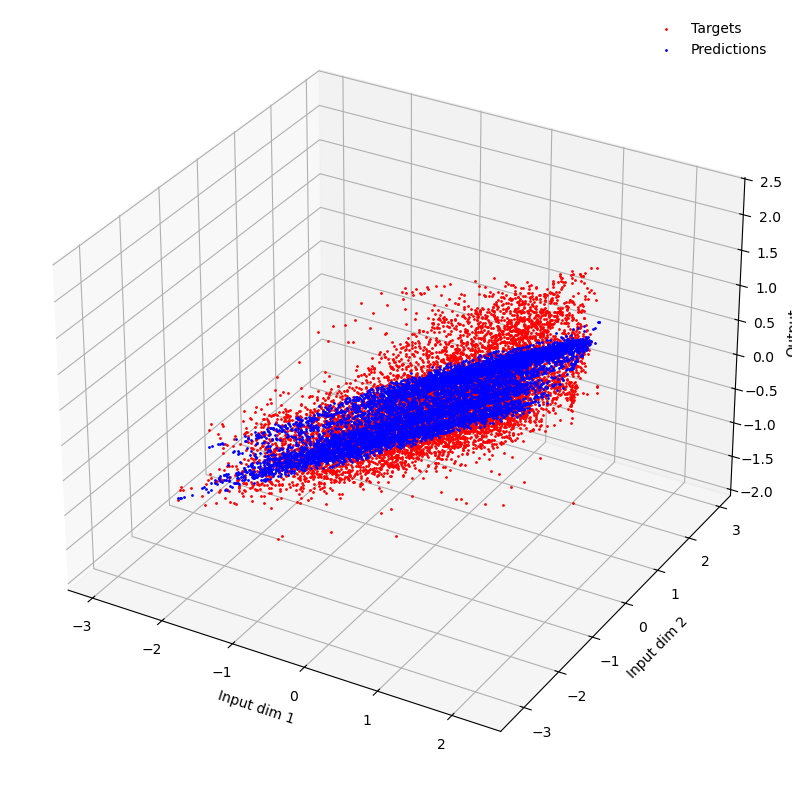

In [41]:
# Plot target and predicted outputs against inputs on same axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(inputs[:, 0], inputs[:, 1], targets[:, 0], 'r.', ms=2)
ax.plot(inputs[:, 0], inputs[:, 1], predictions[:, 0], 'b.', ms=2)
ax.set_xlabel('Input dim 1')
ax.set_ylabel('Input dim 2')
ax.set_zlabel('Output')
ax.legend(['Targets', 'Predictions'], frameon=False)
fig.tight_layout()
plt.show()